# 1. INITIALIZATION


In [126]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

# Data Loading


In [127]:
# Download AAPL data
print("Downloading AAPL data...")
data = yf.download("AAPL", start="2010-01-01", end="2024-10-28")
print(f"Downloaded {len(data)} rows of data")

[*********************100%***********************]  1 of 1 completed

Downloaded 3729 rows of data


In [ ]:
data

In [ ]:
# Check data types
data.dtypes

In [ ]:
data.index

In [ ]:
if 'Date' in data.index:
  print("date is the index")
else:
  print("date is not the index")

In [128]:
data = data.reset_index()

In [ ]:
data

In [ ]:
# Check data types
data.dtypes

# EXPLORE DATASET


In [ ]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("AAPL Open Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("AAPL Close Stock Price")
plt.grid()

plt.suptitle("AAPL Stock Price Over Time")
plt.show()

In [104]:
# Select stock price records since 2010
data_2010 = data[data["Date"].dt.year >= 2010]

# Check filtered data shape
data_2010.shape

(3729, 7)

In [ ]:
# Plot Open stock price performance since 2010
plt.figure(figsize=(18,6))
plt.plot(data_2010["Date"], data_2010["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("AAPL Open Stock Price - Starting From 2010")
plt.grid()

# More libraries

In [129]:
# Import necessary libraries and modules
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
import matplotlib.dates as mdates
import numpy as np

In [130]:
# Set output width
pd.set_option("display.width", 120)

# Feature Engineering

In [131]:
# Feature engineering
print("\nPerforming feature engineering...")
data_2010['Returns'] = data_2010['Close'].pct_change()
data_2010['Log_Returns'] = np.log(data_2010['Close'] / data_2010['Close'].shift(1)) #used for long term average values of stocks
data_2010['MA_5'] = data_2010['Close'].rolling(window=5).mean()  #used for short term average values of stocks
data_2010['MA_20'] = data_2010['Close'].rolling(window=20).mean()
data_2010['Volatility'] = data_2010['Returns'].rolling(window=20).std() # measures standard deviation, how much swings there are in stock prices in a day
data_2010['Price_Momentum'] = data_2010['Close'] / data_2010['Close'].shift(5) - 1 #the rate of stock prices in a 5-day period

# Create lagged features
# for i in range(1, 6):
#     data_2010[f'CloseLag_{i}'] = data_2010['Close'].shift(i) 

# for i in range(1, 6):
#     data_2010[f'OpenLag_{i}'] = data_2010['Open'].shift(i)

# data_2010['PriceMomentum_Lag1'] = data_2010['Price_Momentum'].shift(1)
# data_2010['Volatility_Lag1'] = data_2010['Volatility'].shift(1)
# data_2010['MA5_Lag1'] = data_2010['MA_5'].shift(1)


data_2010 = data_2010.dropna()
print(f"After feature engineering, we have {len(data_2010)} rows")


Performing feature engineering...
After feature engineering, we have 3688 rows


In [ ]:
data_2010

In [ ]:
data_2010.dtypes

In [123]:
# Define selected features and target attribute
features = ['CloseLag_1', 'CloseLag_2', 'CloseLag_3', 'CloseLag_4', 'CloseLag_5', 
            'OpenLag_1', 'OpenLag_2', 'OpenLag_3', 'OpenLag_4', 'OpenLag_5', 'PriceMomentum_Lag1', 'Volatility_Lag1', 'MA5_Lag1']
target = "Close"

In [132]:
# Define selected features and target attribute
features = ['Close', 'Open', 'Price_Momentum', 'Volatility']
target = "Close"

# Create Train, Validation, and Test Datasets


In [133]:
# Define start and end time for each period
train_end_date = pd.to_datetime("2022-12-31")
validate_start_date = pd.to_datetime("2023-01-01")
validate_end_date = pd.to_datetime("2023-12-31")
test_start_date = pd.to_datetime("2024-01-01")
test_end_date = pd.to_datetime("2024-10-27")

# Split dataset into training, validation, and testing
data_train = data_2010[data_2010["Date"] <= train_end_date][features]
data_train_dates = data_2010[data_2010["Date"] <= train_end_date]["Date"]
data_validate = data_2010[(data_2010["Date"] >= validate_start_date) & (data_2010["Date"] <= validate_end_date)][features]
data_validate_dates = data_2010[(data_2010["Date"] >= validate_start_date) & (data_2010["Date"] <= validate_end_date)]["Date"]
data_test = data_2010[(data_2010["Date"] >= test_start_date) & (data_2010["Date"] <= test_end_date)][features]
data_test_dates = data_2010[(data_2010["Date"] >= test_start_date) & (data_2010["Date"] <= test_end_date)]["Date"]

In [134]:
# Display the shape of each dataset
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (3231, 4)
Validation Set: (250, 4)
Testing Set: (207, 4)


In [ ]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

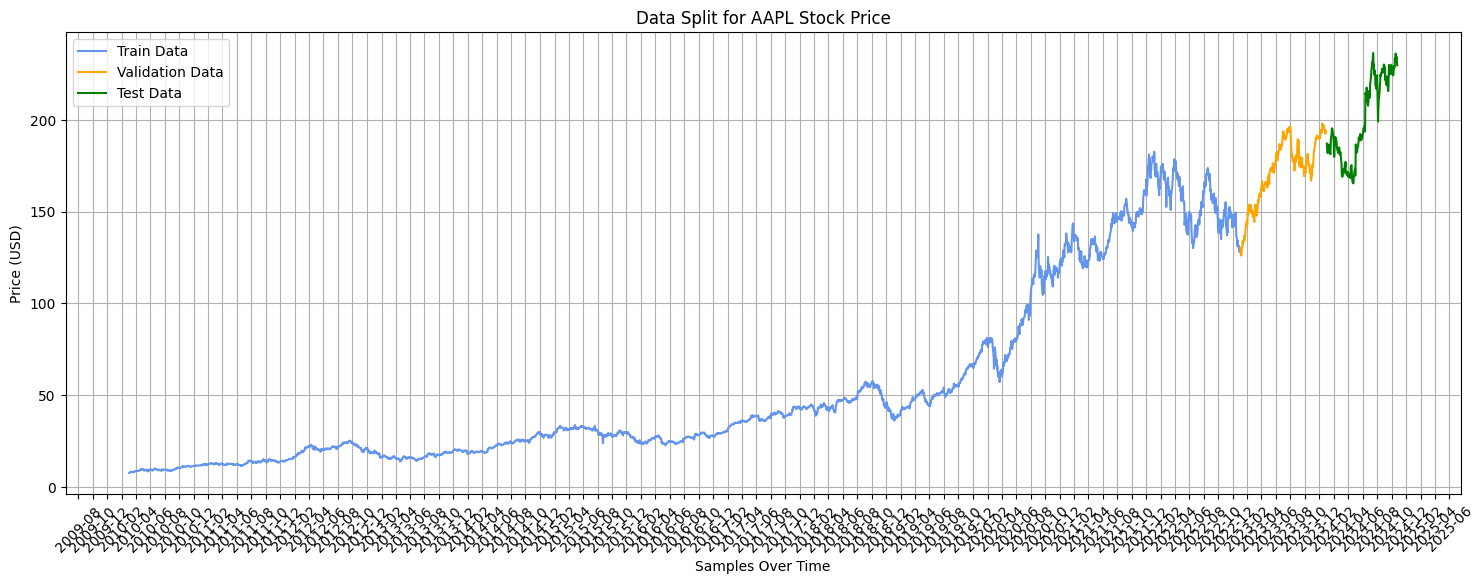

In [135]:
# Plot stock prices for each data split
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for AAPL Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()

## Data Scaling


In [ ]:
# Check the distribution of input features
data_2010[features].describe()

In [136]:
# Initialize scaler with range [0,1]
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform scaler to training set
data_train_scaled = sc.fit_transform(data_train)

# Transform validating and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

In [137]:
# Prepare scaler model name and location
scaler_model_location = r"C:\Users\Ayushman\Desktop\CODES\PYTHON\DIP\Prediction\models"
scaler_model_name = "aapl_stock_price_scaler"
scaler_model_ext = "gz"

# Store scaler model
joblib.dump(sc, scaler_model_location + scaler_model_name + "." + scaler_model_ext)

['C:\\Users\\Ayushman\\Desktop\\CODES\\PYTHON\\DIP\\Prediction\\modelsaapl_stock_price_scaler.gz']

In [138]:
# Combine dates with each corresponding dataset
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features, index=None)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features, index=None)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features, index=None)
data_test_scaled_final["Date"] = data_test_dates.values

# Training Model

In [139]:
# Import necessary libraries and modules
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
import joblib
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [140]:
# Check loaded datasets shape
print(f"Training Dataset Shape: {data_train_scaled_final.shape}")
print(f"Validation Dataset Shape: {data_validate_scaled_final.shape}")
print(f"Testing Dataset Shape: {data_test_scaled_final.shape}")

Training Dataset Shape: (3231, 5)
Validation Dataset Shape: (250, 5)
Testing Dataset Shape: (207, 5)


In [141]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train_scaled_final.head())
print("Validation Dataset:")
print(data_validate_scaled_final.head())
print("Testing Dataset:")
print(data_test_scaled_final.head())

Training Dataset:
      Close      Open  Price_Momentum  Volatility       Date
0  0.000000  0.000000        0.607670    0.148102 2010-03-04
1  0.001687  0.001154        0.682545    0.133103 2010-03-05
2  0.001713  0.002188        0.622028    0.129849 2010-03-08
3  0.002520  0.001841        0.676467    0.128469 2010-03-09
4  0.002892  0.002967        0.693844    0.128071 2010-03-10
Validation Dataset:
      Close      Open  Price_Momentum  Volatility       Date
0  0.673668  0.701123        0.344453    0.239911 2023-01-03
1  0.681061  0.681769        0.409190    0.246622 2023-01-04
2  0.673381  0.683139        0.465197    0.239795 2023-01-05
3  0.699744  0.676745        0.487926    0.273453 2023-01-06
4  0.702782  0.702208        0.492422    0.269698 2023-01-09
Testing Dataset:
      Close      Open  Price_Momentum  Volatility       Date
0  1.020804  1.025806        0.373326    0.118485 2024-01-02
1  1.012838  1.009078        0.360895    0.117517 2024-01-03
2  0.999427  0.997260        0

In [142]:
# Extract dates from each dataset
data_train_dates = data_train_scaled_final["Date"]
data_validate_dates = data_validate_scaled_final["Date"]
data_test_dates = data_test_scaled_final["Date"]

In [143]:
data_train_scaled = data_train_scaled_final[features].values
data_validate_scaled = data_validate_scaled_final[features].values
data_test_scaled = data_test_scaled_final[features].values

# CONSTRUCTING DATA STRUCTURE

In [144]:
# Define a method to construct the input data X and Y
def construct_lstm_data(data, sequence_size, target_attr_idx):
    """
    Construct input data (X) and target data (y) for LSTM model from a pandas DataFrame.

    Parameters:
    -----------
    data : numpy.ndarray
        Input data array of shape (n_samples, n_features).
    
    sequence_size : int
        Number of previous time steps to use as input features for predicting the next time step.
    
    target_attr_idx : int
        Index of column in `data` DataFrame that corresponds to target attribute that LSTM model will predict.

    Returns:
    --------
    data_X : numpy.ndarray
        Array of LSTM input sequences of shape (n_samples - sequence_size, sequence_size, n_features).

    data_y : numpy.ndarray
        Corresponding target values for each input sequence of shape (n_samples - sequence_size,).
    """
    
    # Initialize constructed data variables
    data_X = []
    data_y = []
    
    # Iterate over the dataset
    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i,0:data.shape[1]])
        data_y.append(data[i,target_attr_idx])
        
    # Return constructed variables
    return np.array(data_X), np.array(data_y)

In [145]:
# Define the sequence size
sequence_size = 6

# Construct training data
X_train, y_train = construct_lstm_data(data_train_scaled, sequence_size, 0)

In [155]:
# Combine scaled datasets all together
data_all_scaled = np.concatenate([data_train_scaled, data_validate_scaled, data_test_scaled], axis=0)

# Calculate data size
train_size = len(data_train_scaled)
validate_size = len(data_validate_scaled)
test_size = len(data_test_scaled)

# Construct validation dataset
X_validate, y_validate = construct_lstm_data(data_all_scaled[train_size-sequence_size:train_size+validate_size,:], sequence_size, 0)

# Construct testing dataset
X_test, y_test = construct_lstm_data(data_all_scaled[-(test_size+sequence_size):,:], sequence_size, 0)

In [156]:
# Check original data and data splits shapes
print(f"Full Scaled Data: {data_all_scaled.shape}")
print(f"\n Data Train Scaled: {data_train_scaled.shape}")
print(f"> Data Train X: {X_train.shape}")
print(f"> Data Train y: {y_train.shape}")

print(f"\n Data Validate Scaled: {data_validate_scaled.shape}")
print(f"> Data Validate X: {X_validate.shape}")
print(f"> Data Validate y: {y_validate.shape}")

print(f"\n Data Test Scaled: {data_test_scaled.shape}")
print(f"> Data Test X: {X_test.shape}")
print(f"> Data Test y: {y_test.shape}")

Full Scaled Data: (3688, 4)

 Data Train Scaled: (3231, 4)
> Data Train X: (3225, 6, 4)
> Data Train y: (3225,)

 Data Validate Scaled: (250, 4)
> Data Validate X: (250, 6, 4)
> Data Validate y: (250,)

 Data Test Scaled: (207, 4)
> Data Test X: (207, 6, 4)
> Data Test y: (207,)


# TRAINING LSTM MODEL

In [ ]:
# Initializing the model
regressor = Sequential()
# Add input layer
regressor.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(rate = 0.2))
regressor.add(Dense(units = 1))

# Compiling the model
regressor.compile(optimizer = "adam", loss="mean_squared_error")

In [165]:
# Create a checkpoint to monitor the validation loss and save the model with the best performance.
model_location = r"C:\Users\Ayushman\Desktop\CODES\PYTHON\DIP\Prediction\models\\"
model_name = "aapl_stock_price_lstm.model.keras"
best_model_checkpoint_callback = ModelCheckpoint(
    model_location + model_name, 
    monitor="val_loss", 
    save_best_only=True, 
    mode="min", 
    verbose=0)

In [167]:
# Training the model
history = regressor.fit(
    x = X_train, 
    y = y_train, 
    validation_data=(X_validate, y_validate), 
    epochs= 10)

Epoch 1/10
101/101 [==============================] - 2s 23ms/step - loss: 0.0015 - val_loss: 0.0134
Epoch 2/10
101/101 [==============================] - 2s 20ms/step - loss: 0.0013 - val_loss: 0.0088
Epoch 3/10
101/101 [==============================] - 2s 20ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 4/10
101/101 [==============================] - 3s 26ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/10
101/101 [==============================] - 3s 29ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/10
101/101 [==============================] - 3s 34ms/step - loss: 8.7177e-04 - val_loss: 0.0061
Epoch 7/10
101/101 [==============================] - 3s 27ms/step - loss: 9.5568e-04 - val_loss: 0.0028
Epoch 8/10
101/101 [==============================] - 2s 24ms/step - loss: 9.4151e-04 - val_loss: 0.0024
Epoch 9/10
101/101 [==============================] - 4s 36ms/step - loss: 8.9396e-04 - val_loss: 0.0013
Epoch 10/10
101/101 [==============================] - 3s 33ms/step - loss:

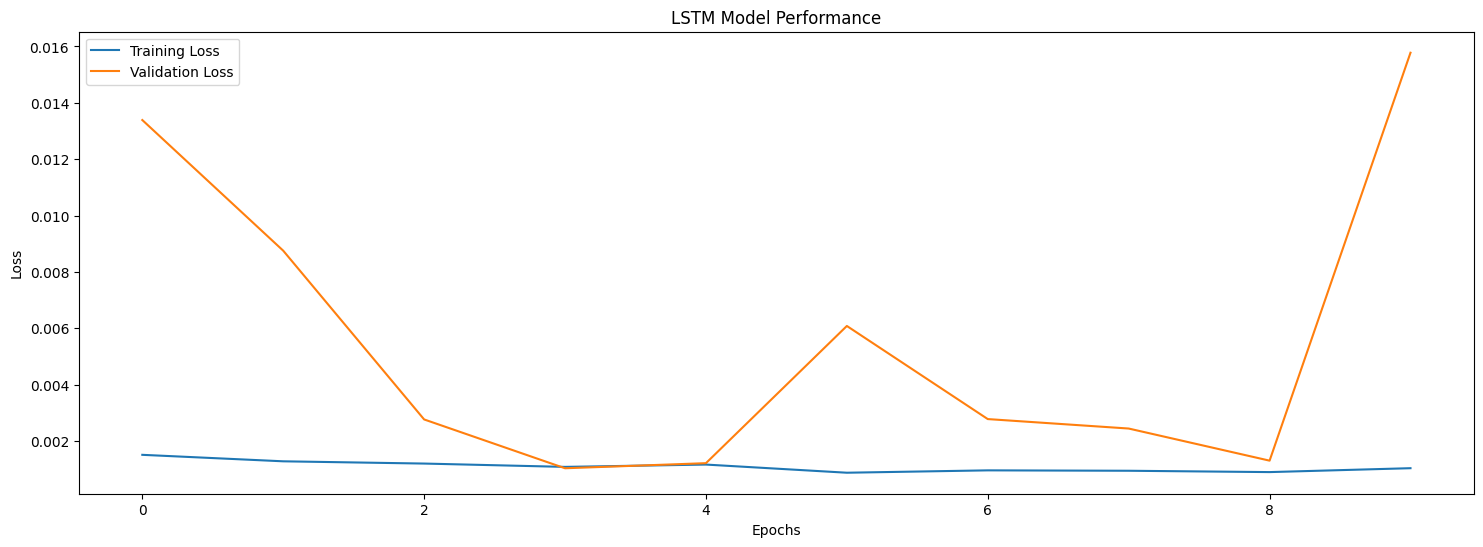

In [168]:
# Visualizing model performance during training
plt.figure(figsize=(18, 6))

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Load Best Model


In [ ]:
# Prepare model location and name
model_location = "..//models//"
model_name = "aapl_stock_price_lstm.model.keras"

# Load the best performing model
best_model = load_model(model_location + model_name)

In [169]:
# Predict stock price for all data splits
y_train_predict = regressor.predict(X_train)
y_validate_predict = regressor.predict(X_validate)
y_test_predict = regressor.predict(X_test)

7/7 [==============================] - 0s 9ms/step


In [170]:
# Prepare scaler model name and location
scaler_model_location = r"C:\Users\Ayushman\Desktop\CODES\PYTHON\DIP\Prediction\models"
scaler_model_name = "aapl_stock_price_scaler"
scaler_model_ext = "gz"

# Store the scaler model
sc = joblib.load(scaler_model_location + scaler_model_name + "." + scaler_model_ext)

In [194]:
np.column_stack((y_train, np.zeros((y_train.shape[0], 3))))

array([[0.00325244, 0.        , 0.        , 0.        ],
       [0.00268751, 0.        , 0.        , 0.        ],
       [0.00281237, 0.        , 0.        , 0.        ],
       ...,
       [0.67922681, 0.        , 0.        , 0.        ],
       [0.69968706, 0.        , 0.        , 0.        ],
       [0.70152099, 0.        , 0.        , 0.        ]])

In [197]:

y_train_inv = sc.inverse_transform(np.column_stack((y_train, np.zeros((y_train.shape[0], 3)))))[:, 0]
y_validate_inv = sc.inverse_transform(np.column_stack((y_validate, np.zeros((y_validate.shape[0], 3)))))[:, 0]
y_test_inv = sc.inverse_transform(np.column_stack((y_test, np.zeros((y_test.shape[0], 3)))))[:, 0]

y_train_predict_inv = sc.inverse_transform(np.column_stack((y_train_predict, np.zeros((y_train_predict.shape[0], 3)))))[:, 0]
y_validate_predict_inv = sc.inverse_transform(np.column_stack((y_validate_predict, np.zeros((y_validate_predict.shape[0], 3)))))[:, 0]
y_test_predict_inv = sc.inverse_transform(np.column_stack((y_test_predict, np.zeros((y_test_predict.shape[0], 3)))))[:, 0]


In [198]:
# Define chart colors
train_actual_color = "cornflowerblue"
validate_actual_color = "orange"
test_actual_color = "green"
train_predicted_color = "lightblue"
validate_predicted_color = "peru"
test_predicted_color = "limegreen"

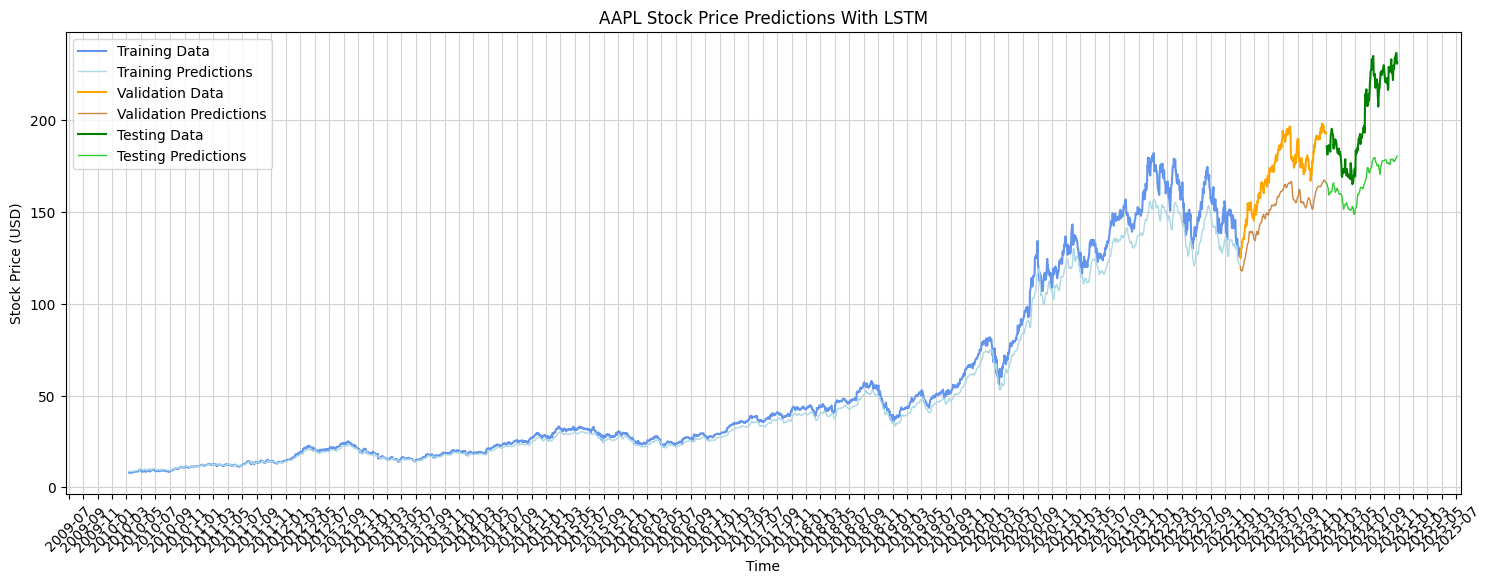

In [199]:
# Plot actual and predicted price
plt.figure(figsize=(18,6))
plt.plot(data_train_dates[sequence_size:,], y_train_inv, label="Training Data", color=train_actual_color)
plt.plot(data_train_dates[sequence_size:,], y_train_predict_inv, label="Training Predictions", linewidth=1, color=train_predicted_color)

plt.plot(data_validate_dates, y_validate_inv, label="Validation Data", color=validate_actual_color)
plt.plot(data_validate_dates, y_validate_predict_inv, label="Validation Predictions", linewidth=1, color=validate_predicted_color)

plt.plot(data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color)
plt.plot(data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=1, color=test_predicted_color)

plt.title("AAPL Stock Price Predictions With LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.legend()
plt.grid(color="lightgray")

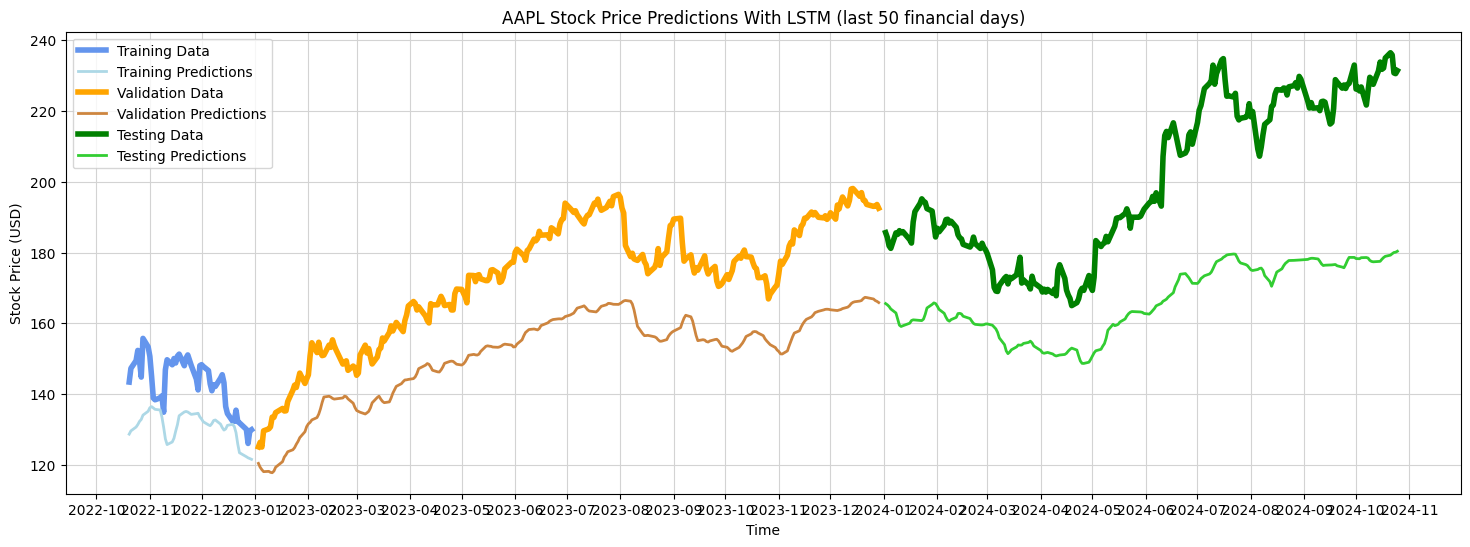

In [200]:
recent_samples = 50
plt.figure(figsize=(18,6))
plt.plot(data_train_dates[-recent_samples:,], y_train_inv[-recent_samples:,], label="Training Data", color=train_actual_color, linewidth=4)
plt.plot(data_train_dates[-recent_samples:,], y_train_predict_inv[-recent_samples:,], label="Training Predictions", linewidth=2, color=train_predicted_color)

plt.plot(data_validate_dates, y_validate_inv, label="Validation Data", color=validate_actual_color, linewidth=4)
plt.plot(data_validate_dates, y_validate_predict_inv, label="Validation Predictions", linewidth=2, color=validate_predicted_color)

plt.plot(data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color, linewidth=4)
plt.plot(data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=2, color=test_predicted_color)

plt.title("AAPL Stock Price Predictions With LSTM (last 50 financial days)")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# plt.xticks(rotation=45)
plt.legend()
plt.grid(color="lightgray")

adapted from https://github.com/sinanw/lstm-stock-price-prediction/tree/main